In [1]:
!pip install torch
!pip install transformers
!pip install emoji
!pip install soynlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 3.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
file_path = "/content/drive/MyDrive/23-2 창의적종합설계 /data/paxnet/seegene_전체기간.csv"

# pandas로 CSV 파일 읽기
df = pd.read_csv(file_path)
df.head()

,제목,조회수,추천수,게시일,본문
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n


In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")
model = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base")

tokenizer_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/514 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.weight', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
import torch
df = df.dropna(subset=['본문'])

titles = df['본문'].astype(str).tolist()

# 감정분석 수행
predictions = []
probabilities = []  # 확률을 저장할 리스트

for title in titles:
    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # softmax 확률 계산
        probs = torch.softmax(logits, dim=-1)[0]  # 첫 번째 차원에서 softmax 적용

        pred = torch.argmax(logits, dim=1).item()
        predictions.append(pred)

        # 최대 확률값만 저장 (예측된 클래스의 확률)
        probabilities.append(probs[pred].item())

df['본문_감정분석결과'] = predictions
df['본문_감정분석확률'] = probabilities  # 데이터프레임에 확률 열 추가

In [6]:
df

,제목,조회수,추천수,게시일,본문,본문_감정분석결과,본문_감정분석확률
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.,1,0.515800
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉,1,0.509261
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...,1,0.507324
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ,1,0.511289
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n,0,0.501592
...,...,...,...,...,...,...,...
1085,\n코로나발 경제 위기 \n,162,1,2020-03-04,"\n대한민국, 이탈리아, 곧 이을 미국까지진단 -> 격리 치료 -> 진단 -> 격리...",1,0.504453
1086,\nWHO최대걱정\n,304,0,2020-03-03,\n한국 이탈리아 이란 일본일본이 제일 걱정이겠구만. 손을 놓고 있는 애덜이 걱정이...,1,0.505975
1087,\n씨젠의 하락조건\n,424,0,2020-03-03,\n코로나상황급개선+지수급락..교집합조건일때만하락이 외에는 지수급등이나코로나상황악화...,1,0.505905
1088,\n미국 코로나 관련주는\n,193,0,2020-03-03,\n나스닥과 SNP지수에 상관없이 지속상승씨젠과 같은 모습임,1,0.512953


In [7]:
value_counts = df['본문_감정분석결과'].value_counts()
print(value_counts)

1    1050
0      40
Name: 본문_감정분석결과, dtype: int64


In [8]:
new_df = df.groupby('게시일')['본문_감정분석결과'].mean().reset_index()
new_df

,게시일,본문_감정분석결과
0,2020-03-02,1.00
1,2020-03-03,1.00
2,2020-03-04,1.00
3,2020-03-05,1.00
4,2020-03-06,1.00
...,...,...
138,2020-08-27,0.75
139,2020-08-28,1.00
140,2020-08-29,1.00
141,2020-08-30,0.00


In [9]:
df['본문_감정분석확률'] = df.apply(lambda x: 1 - x['본문_감정분석확률'] if x['본문_감정분석결과'] == 0 else x['본문_감정분석확률'], axis=1)

# 결과 확인
df.head()

,제목,조회수,추천수,게시일,본문,본문_감정분석결과,본문_감정분석확률
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.,1,0.515800
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉,1,0.509261
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...,1,0.507324
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ,1,0.511289
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n,0,0.498408


In [10]:
df

,제목,조회수,추천수,게시일,본문,본문_감정분석결과,본문_감정분석확률
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.,1,0.515800
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉,1,0.509261
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...,1,0.507324
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ,1,0.511289
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n,0,0.498408
...,...,...,...,...,...,...,...
1085,\n코로나발 경제 위기 \n,162,1,2020-03-04,"\n대한민국, 이탈리아, 곧 이을 미국까지진단 -> 격리 치료 -> 진단 -> 격리...",1,0.504453
1086,\nWHO최대걱정\n,304,0,2020-03-03,\n한국 이탈리아 이란 일본일본이 제일 걱정이겠구만. 손을 놓고 있는 애덜이 걱정이...,1,0.505975
1087,\n씨젠의 하락조건\n,424,0,2020-03-03,\n코로나상황급개선+지수급락..교집합조건일때만하락이 외에는 지수급등이나코로나상황악화...,1,0.505905
1088,\n미국 코로나 관련주는\n,193,0,2020-03-03,\n나스닥과 SNP지수에 상관없이 지속상승씨젠과 같은 모습임,1,0.512953


In [11]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# '감정분석확률' 컬럼을 scaling. fit_transform은 2차원 배열을 기대하기 때문에 reshape(-1, 1)을 사용
df['본문_보정된_감정분석확률'] = scaler.fit_transform(df['본문_감정분석확률'].values.reshape(-1, 1))

# 결과 확인
df.head()

,제목,조회수,추천수,게시일,본문,본문_감정분석결과,본문_감정분석확률,본문_보정된_감정분석확률
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.,1,0.515800,0.771174
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉,1,0.509261,0.518265
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...,1,0.507324,0.443365
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ,1,0.511289,0.596676
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n,0,0.498408,0.098547


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IP

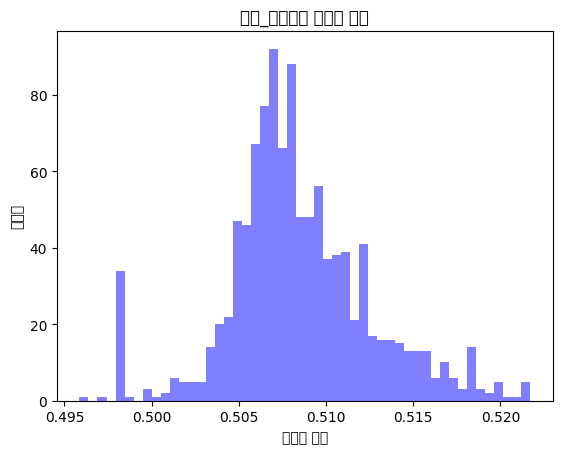

In [12]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(df['본문_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('본문_감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

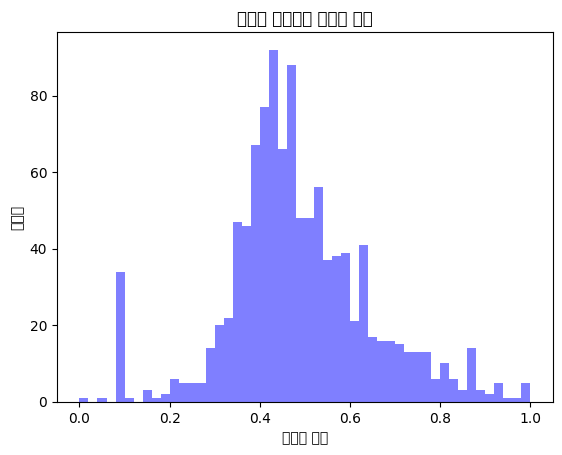

In [13]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(df['본문_보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('보정된 감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

min-max 스케일링으로 한번 표준화를 거쳤기 때문에 또다시 가공하는 것은 데이터를 조작하는것 같다.
따라서
0.15
0.2
0.3
0.2
0.15
이 비율로 나눔

In [14]:
def assign_label(value):
    if value <= 0.15:
        return '강한 부정'
    elif value <= 0.35:
        return '약한 부정'
    elif value <= 0.65:
        return '중립'
    elif value <= 0.85:
        return '약한 긍정'
    else:
        return '강한 긍정'

df['감정레이블'] = df['본문_보정된_감정분석확률'].apply(assign_label)


df.head()


,제목,조회수,추천수,게시일,본문,본문_감정분석결과,본문_감정분석확률,본문_보정된_감정분석확률,감정레이블
0,\n씨젠 종가에 90만주 땡긴건 뭐죠?\n,367,0,2020-08-31,\n아시는 분?호재 공시가 있나?궁금 하네.,1,0.515800,0.771174,약한 긍정
1,\n코스탁 1000까지 간다\n,96,2,2020-08-31,\n따봉,1,0.509261,0.518265,중립
2,\n씨젠이 32만원까지 올라갈수 있었던 이유\n,312,2,2020-08-31,\n미국은 상장사 대부분이 우량주또한 돈을 마음대로 찍어낼수 있어서지금 무지막지하게...,1,0.507324,0.443365,중립
3,\n유니온커뮤니티 제2씨젠 코로나비대면생체인식 독점\n,108,0,2020-08-31,\nㅈㅂ,1,0.511289,0.596676,중립
4,\n사랑교회를 밀어버리려는 정권 교회놔두고 개발하라 문좌경아 \n,141,1,2020-08-30,\n,0,0.498408,0.098547,강한 부정


In [15]:
emotion_label_counts = df['감정레이블'].value_counts()

print(emotion_label_counts)

중립       799
약한 긍정    120
약한 부정    101
강한 부정     38
강한 긍정     32
Name: 감정레이블, dtype: int64


In [ ]:
Tdf = df.dropna(subset=['제목'])

titles = Tdf['제목'].astype(str).tolist()

# 감정분석 수행
predictions = []
probabilities = []  # 확률을 저장할 리스트

for title in titles:
    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # softmax 확률 계산
        probs = torch.softmax(logits, dim=-1)[0]  # 첫 번째 차원에서 softmax 적용

        pred = torch.argmax(logits, dim=1).item()
        predictions.append(pred)

        # 최대 확률값만 저장 (예측된 클래스의 확률)
        probabilities.append(probs[pred].item())

Tdf['제목_감정분석결과'] = predictions
Tdf['제목_감정분석확률'] = probabilities  # 데이터프레임에 확률 열 추가

In [ ]:
Tdf['제목_감정분석확률'] = Tdf.apply(lambda x: 1 - x['제목_감정분석확률'] if x['제목_감정분석결과'] == 0 else x['제목_감정분석확률'], axis=1)

# 결과 확인
Tdf.head()

,제목,조회수,추천수,게시일,본문,글자수합,토큰수,본문_감정분석결과,본문_감정분석확률,본문_보정된_감정분석확률,감정레이블,제목_감정분석결과,제목_감정분석확률
0,이차전지 곡소리 전주곡,278,0,2023-07-31,유튜버 사이비들이 조잘거려도 현실과 꿈의 괴리는 좁혀질수밖에 없다테슬라실적이 적자전...,580,219,0,0.438376,0.047843,강한 부정,0,0.460283
1,에코프로의 운명은,274,0,2023-07-31,한때 저들도 하늘로 치솟다 못해 달나라로 가는줄 알았다,39,14,0,0.448873,0.232053,약한 부정,0,0.476276
2,종가는 예상,387,0,2023-07-31,종가 로 보는 이유바베큐차는 하이브리드만큼 팔수가없다아이들만 관심 어른들은 패스충전...,300,135,0,0.446745,0.194700,약한 부정,0,0.490522
3,이차전지와 강남공구리 거품경합,4877,0,2023-07-30,세방리튬배터리 미국 수출 한국산업기술시험원 은 수출 활성화를 위한 신속 지원 조치로...,1111,451,0,0.440804,0.090447,강한 부정,0,0.452104
4,공매도 제도 개선에 관한 국민동의청원,597,1,2023-07-30,주식을 빌리지 않고 미리 공매도를 하는 무차입 공매도 는 금지되어 있는데 공매도 세...,135,46,0,0.439744,0.071845,강한 부정,0,0.454646


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# '감정분석확률' 컬럼을 scaling. fit_transform은 2차원 배열을 기대하기 때문에 reshape(-1, 1)을 사용
Tdf['제목_보정된_감정분석확률'] = scaler.fit_transform(Tdf['제목_감정분석확률'].values.reshape(-1, 1))

# 결과 확인
Tdf.head()

,제목,조회수,추천수,게시일,본문,글자수합,토큰수,본문_감정분석결과,본문_감정분석확률,본문_보정된_감정분석확률,감정레이블,제목_감정분석결과,제목_감정분석확률,제목_보정된_감정분석확률
0,이차전지 곡소리 전주곡,278,0,2023-07-31,유튜버 사이비들이 조잘거려도 현실과 꿈의 괴리는 좁혀질수밖에 없다테슬라실적이 적자전...,580,219,0,0.438376,0.047843,강한 부정,0,0.460283,0.444559
1,에코프로의 운명은,274,0,2023-07-31,한때 저들도 하늘로 치솟다 못해 달나라로 가는줄 알았다,39,14,0,0.448873,0.232053,약한 부정,0,0.476276,0.736195
2,종가는 예상,387,0,2023-07-31,종가 로 보는 이유바베큐차는 하이브리드만큼 팔수가없다아이들만 관심 어른들은 패스충전...,300,135,0,0.446745,0.194700,약한 부정,0,0.490522,0.995970
3,이차전지와 강남공구리 거품경합,4877,0,2023-07-30,세방리튬배터리 미국 수출 한국산업기술시험원 은 수출 활성화를 위한 신속 지원 조치로...,1111,451,0,0.440804,0.090447,강한 부정,0,0.452104,0.295405
4,공매도 제도 개선에 관한 국민동의청원,597,1,2023-07-30,주식을 빌리지 않고 미리 공매도를 하는 무차입 공매도 는 금지되어 있는데 공매도 세...,135,46,0,0.439744,0.071845,강한 부정,0,0.454646,0.341749


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

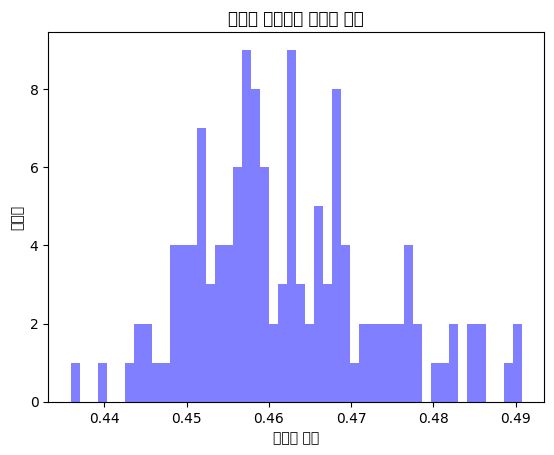

In [ ]:
# 히스토그램 생성
plt.hist(Tdf['제목_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('보정된 감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

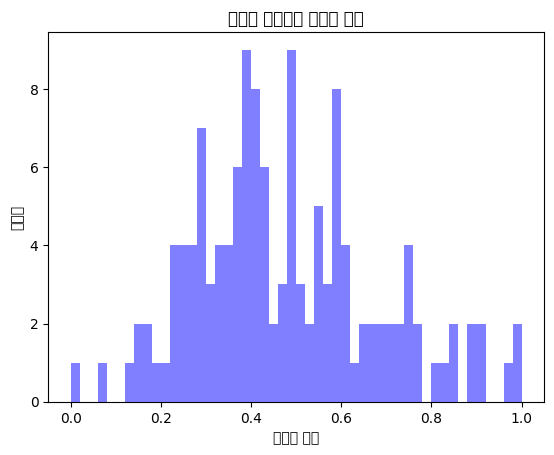

In [ ]:
# 히스토그램 생성
plt.hist(Tdf['제목_보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('보정된 감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

In [ ]:
def assign_label(value):
    if value <= 0.15:
        return '강한 부정'
    elif value <= 0.35:
        return '약한 부정'
    elif value <= 0.65:
        return '중립'
    elif value <= 0.85:
        return '약한 긍정'
    else:
        return '강한 긍정'

Tdf['감정레이블'] = Tdf['제목_보정된_감정분석확률'].apply(assign_label)


Tdf.head()

,제목,조회수,추천수,게시일,본문,글자수합,토큰수,본문_감정분석결과,본문_감정분석확률,본문_보정된_감정분석확률,감정레이블,제목_감정분석결과,제목_감정분석확률,제목_보정된_감정분석확률
0,이차전지 곡소리 전주곡,278,0,2023-07-31,유튜버 사이비들이 조잘거려도 현실과 꿈의 괴리는 좁혀질수밖에 없다테슬라실적이 적자전...,580,219,0,0.438376,0.047843,중립,0,0.460283,0.444559
1,에코프로의 운명은,274,0,2023-07-31,한때 저들도 하늘로 치솟다 못해 달나라로 가는줄 알았다,39,14,0,0.448873,0.232053,약한 긍정,0,0.476276,0.736195
2,종가는 예상,387,0,2023-07-31,종가 로 보는 이유바베큐차는 하이브리드만큼 팔수가없다아이들만 관심 어른들은 패스충전...,300,135,0,0.446745,0.194700,강한 긍정,0,0.490522,0.995970
3,이차전지와 강남공구리 거품경합,4877,0,2023-07-30,세방리튬배터리 미국 수출 한국산업기술시험원 은 수출 활성화를 위한 신속 지원 조치로...,1111,451,0,0.440804,0.090447,약한 부정,0,0.452104,0.295405
4,공매도 제도 개선에 관한 국민동의청원,597,1,2023-07-30,주식을 빌리지 않고 미리 공매도를 하는 무차입 공매도 는 금지되어 있는데 공매도 세...,135,46,0,0.439744,0.071845,약한 부정,0,0.454646,0.341749


In [ ]:
emotion_label_counts = Tdf['감정레이블'].value_counts()

print(emotion_label_counts)

중립       71
약한 부정    35
약한 긍정    17
강한 긍정     9
강한 부정     3
Name: 감정레이블, dtype: int64


In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/eco_전체기간_제목본문통합.csv"

# pandas로 CSV 파일 읽기
TCdf = pd.read_csv(file_path)
TCdf.head()

,게시일,제목,조회수,추천수
0,2023-07-31,이차전지 곡소리 전주곡 유튜버 사이비들이 조잘거려도 현실과 꿈의 괴리는 좁혀질수밖에...,283,0
1,2023-07-31,에코프로의 운명은 한때 저들도 하늘로 치솟다 못해 달나라로 가는줄 알았다,280,0
2,2023-07-31,종가는 예상 종가 로 보는 이유바베큐차는 하이브리드만큼 팔수가없다아이들만 관심 어른...,390,0
3,2023-07-30,이차전지와 강남공구리 거품경합 세방리튬배터리 미국 수출 한국산업기술시험원 은 수출 ...,4879,0
4,2023-07-30,공매도 제도 개선에 관한 국민동의청원 주식을 빌리지 않고 미리 공매도를 하는 무차입...,599,1


In [ ]:
import torch
TCdf = TCdf.dropna(subset=['제목'])

titles = TCdf['제목'].astype(str).tolist()

# 감정분석 수행
predictions = []
probabilities = []  # 확률을 저장할 리스트

for title in titles:
    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        # softmax 확률 계산
        probs = torch.softmax(logits, dim=-1)[0]  # 첫 번째 차원에서 softmax 적용

        pred = torch.argmax(logits, dim=1).item()
        predictions.append(pred)

        # 최대 확률값만 저장 (예측된 클래스의 확률)
        probabilities.append(probs[pred].item())

df['제목본문_감정분석결과'] = predictions
df['제목본문_감정분석확률'] = probabilities  # 데이터프레임에 확률 열 추가

ValueError: ignored

In [ ]:
value_counts = TCdf['제목본문_감정분석결과'].value_counts()
print(value_counts)

In [ ]:
new_TC_df = TCdf.groupby('게시일')['제목본문_감정분석결과'].mean().reset_index()
new_TC_df

In [ ]:
TCdf['제목본문_감정분석확률'] = df.apply(lambda x: 1 - x['제목본문_감정분석확률'] if x['제목본문_감정분석결과'] == 0 else x['제목본문_감정분석확률'], axis=1)

# 결과 확인
TCdf.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 인스턴스 생성
scaler = MinMaxScaler()

# '감정분석확률' 컬럼을 scaling. fit_transform은 2차원 배열을 기대하기 때문에 reshape(-1, 1)을 사용
TCdf['제목본문_보정된_감정분석확률'] = scaler.fit_transform(TCdf['제목본문_감정분석확률'].values.reshape(-1, 1))

# 결과 확인
df.head()

In [ ]:
import matplotlib.pyplot as plt

# 히스토그램 생성
plt.hist(TCdf['제목본문_보정된_감정분석확률'], bins=50, alpha=0.5, color='blue')

# 그래프 제목과 축 레이블 설정
plt.title('보정된 감정분석 확률의 분포')
plt.xlabel('보정된 확률')
plt.ylabel('빈도수')

# 그래프 보여주기
plt.show()

In [ ]:
def assign_label(value):
    if value <= 0.15:
        return '강한 부정'
    elif value <= 0.35:
        return '약한 부정'
    elif value <= 0.65:
        return '중립'
    elif value <= 0.85:
        return '약한 긍정'
    else:
        return '강한 긍정'

TCdf['감정레이블'] = TCdf['제목본문_보정된_감정분석확률'].apply(assign_label)


TCdf

In [ ]:
emotion_label_counts = TCdf['|감정레이블'].value_counts()

print(emotion_label_counts)